In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\kerry\OneDrive\HAP 774\all-mg-codes.txt", delimiter='xxxx')

C:\Users\kerry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df['image'] = df.apply(lambda r: r[0].split('\t')[0], axis=1)

In [4]:
df['classes'] = df.apply(lambda r: r[0].split('\t')[1], axis=1)

In [5]:
df['abnormal'] = df.apply( lambda r: 0 if r['classes'] == '0' else 1,axis=1)

In [6]:
df[['image', 'classes', 'abnormal']]

,image,classes,abnormal
0,im0002,13 9,1
1,im0003,14,1
2,im0004,14 3,1
3,im0005,3 5,1
4,im0006,14,1
5,im0007,13 14 9 10,1
6,im0008,13 14 9,1
7,im0009,7,1
8,im0010,14,1
9,im0011,13 14,1


In [7]:
df['abnormal'].mean()

0.9090909090909091

In [8]:
from PIL import Image

In [9]:
im = Image.open(r"C:\Users\kerry\OneDrive\HAP 774\all-images\im0001.ppm")

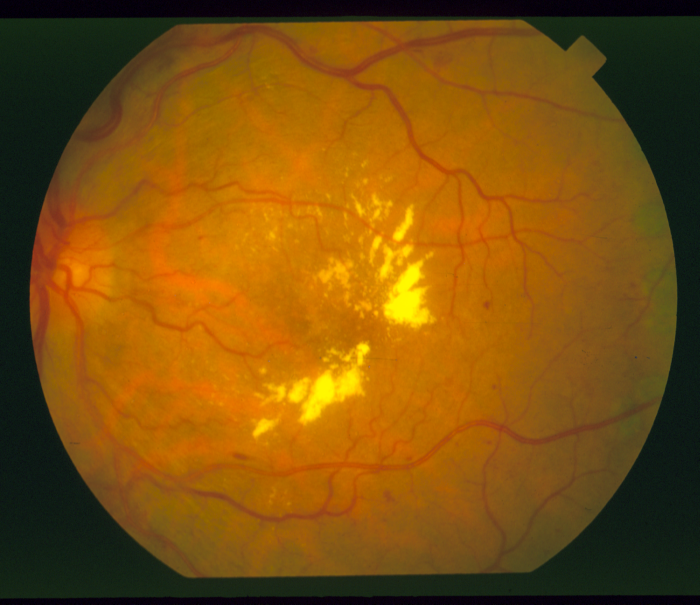

In [10]:
im

In [11]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [12]:
df

,im0001 7 Background Diabetic Retinopathy,image,classes,abnormal
0,im0002\t13 9\t\tChoroidal Neovascularization A...,im0002,13 9,1
1,"im0003\t14\t"" Drusen, large AND Geograp...",im0003,14,1
2,im0004\t14 3\t\tCilio-Retinal Artery Occlusion...,im0004,14 3,1
3,im0005\t3 5\t\t\tCentral Retinal Artery Occlus...,im0005,3 5,1
4,im0006\t14\t\t\tDrusen,im0006,14,1
5,im0007\t13 14 9 10\tChoroidal Neovascularizati...,im0007,13 14 9 10,1
6,im0008\t13 14 9\t Choroidal Neovascularizat...,im0008,13 14 9,1
7,im0009\t7\t\t\tBackground Diabetic Retinopathy,im0009,7,1
8,im0010\t14\t\t\tHistoplasmosis,im0010,14,1
9,im0011\t13 14\t\tChoroidal Neovascularization ...,im0011,13 14,1


In [13]:
class eDL(Dataset):
    def __init__(self, labels, transform=None, target_transform=None):
        self.img_labels = labels
        
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        

        img_path = "C:/Users/kerry/OneDrive/HAP 774/all-images/" + self.img_labels.loc[idx,'image'] + '.ppm'
        image = Image.open(img_path)
        
        
        
        label = self.img_labels.loc[idx, 'abnormal']
        
        if self.transform:
            image = self.transform(image)
        #if self.target_transform:
        #    label = self.target_transform(label)
        return image, label

In [14]:
len(df)

396

In [15]:
#dl = eDL(df[['image','abnormal']])

In [16]:
#dl.__getitem__(0)

In [17]:
from torchvision import datasets, transforms

In [18]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    #transforms.Normalize(
    #    mean=[0.485, 0.456, 0.406],
    #    std=[0.229, 0.224, 0.225]
    ])

In [19]:
df=df.sample(frac=1, random_state=1000).reset_index(drop=True)

In [20]:
tr_df = df[:int(len(df)*0.8)].reset_index(drop=True)
ts_df = df[int(len(df)*0.8):].reset_index(drop=True)

In [21]:
ts_df[ts_df['image'] == 'im0049']

,im0001 7 Background Diabetic Retinopathy,image,classes,abnormal


In [22]:
tr=eDL(tr_df[['image','abnormal']], preprocess)
ts=eDL(ts_df[['image','abnormal']], preprocess)

In [23]:
len(ts_df)

80

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(tr, batch_size=64, shuffle=True)
test_dataloader = DataLoader(ts, batch_size=64, shuffle=True)

In [25]:
ts.__len__()

80

In [26]:
tr.__getitem__(0)

(tensor([[[0.1059, 0.1059, 0.1059,  ..., 0.1137, 0.1059, 0.1098],
          [0.1020, 0.1020, 0.1020,  ..., 0.1098, 0.1059, 0.1098],
          [0.1020, 0.1020, 0.1020,  ..., 0.1451, 0.1059, 0.1098],
          ...,
          [0.0941, 0.0941, 0.0941,  ..., 0.1020, 0.0980, 0.1020],
          [0.0941, 0.0941, 0.0941,  ..., 0.0980, 0.0980, 0.0980],
          [0.0941, 0.0980, 0.0980,  ..., 0.1020, 0.1020, 0.1020]],
 
         [[0.1843, 0.1843, 0.1882,  ..., 0.1882, 0.1843, 0.1843],
          [0.1804, 0.1843, 0.1843,  ..., 0.1843, 0.1843, 0.1804],
          [0.1804, 0.1804, 0.1804,  ..., 0.1843, 0.1804, 0.1804],
          ...,
          [0.1647, 0.1608, 0.1647,  ..., 0.1686, 0.1686, 0.1686],
          [0.1647, 0.1647, 0.1686,  ..., 0.1686, 0.1686, 0.1647],
          [0.1686, 0.1686, 0.1647,  ..., 0.1686, 0.1647, 0.1686]],
 
         [[0.1020, 0.0980, 0.0980,  ..., 0.0980, 0.0941, 0.0980],
          [0.0980, 0.0941, 0.0941,  ..., 0.0980, 0.0941, 0.0941],
          [0.0980, 0.0980, 0.0980,  ...,

In [27]:
from torch import nn

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 12, 4, 2)
        
        self.conv2 = nn.Conv2d(12, 24, 4, 2)
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            
            nn.Linear(in_features=12*111*111, out_features=50),
            nn.ReLU(),
            nn.Linear(50, 2)
        )

    def forward(self, x):
        
        #print("original", x.shape)
        x = self.conv1(x)
        #print("after conv1", x.shape)
        
        #x = self.conv2(x)
        #print("after conv2", x.shape)
        
        x = self.flatten(x)
        #print("after flatten",x.shape)
        
        #print('after flatten  ', x.shape)
        logits = self.linear_relu_stack(x)
        #print('final ', logits.shape)
        return logits

In [29]:
model = NeuralNetwork().to('cpu')

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [31]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to('cpu'), y.to('cpu')

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [32]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to('cpu'), y.to('cpu')
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [33]:
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.715117  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.308044 

Epoch 2
-------------------------------
loss: 0.304723  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.317726 

Epoch 3
-------------------------------
loss: 0.298362  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.216736 

Epoch 4
-------------------------------
loss: 0.254385  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.272019 

Epoch 5
-------------------------------
loss: 0.226893  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.307474 

Epoch 6
-------------------------------
loss: 0.264643  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.273060 

Epoch 7
-------------------------------
loss: 0.292390  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.212325 

Epoch 8
-------------------------------
loss: 0.449057  [    0/  316]
Test Error: 
 Accuracy: 91.2%, Avg loss: 0.313692 

Epoch 9
----------------

In [35]:
from torchvision import models

In [36]:
resnet = models.resnet101(pretrained=True)

In [42]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [43]:
for w in resnet.parameters():
    w.requires_grad = False

In [44]:
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [45]:
resnet.fc = nn.Linear(2048, 2)

In [46]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [47]:
resnet = resnet.to('cpu')

In [48]:

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, resnet, loss_fn, optimizer)
    print('after train')
    test(test_dataloader, resnet, loss_fn)
print("Done!")

Epoch 1
-------------------------------


C:\Users\kerry\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


loss: 0.541822  [    0/  316]
after train
Test Error: 
 Accuracy: 86.2%, Avg loss: 0.582457 

Epoch 2
-------------------------------
loss: 0.534938  [    0/  316]
after train
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.591526 

Epoch 3
-------------------------------
loss: 0.554497  [    0/  316]
after train
Test Error: 
 Accuracy: 88.8%, Avg loss: 0.582846 

Epoch 4
-------------------------------
loss: 0.566906  [    0/  316]
after train
Test Error: 
 Accuracy: 88.8%, Avg loss: 0.577507 

Epoch 5
-------------------------------
loss: 0.561585  [    0/  316]
after train
Test Error: 
 Accuracy: 88.8%, Avg loss: 0.531256 

Epoch 6
-------------------------------
loss: 0.553948  [    0/  316]
after train
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.554391 

Epoch 7
-------------------------------
loss: 0.585242  [    0/  316]
after train
Test Error: 
 Accuracy: 87.5%, Avg loss: 0.548265 

Epoch 8
-------------------------------
loss: 0.571872  [    0/  316]
after train
Test Error: 
 Accura